In [7]:
import pandas as pd # load data & one-hot encoding
import numpy as np # calculate mean and SD

import matplotlib.pyplot as plt # visualization

from sklearn.tree import DecisionTreeClassifier # to build classification tree
from sklearn.tree import plot_tree # to draw classification tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix

## Import Data

Data description:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

Data source: https://archive.ics.uci.edu/ml/datasets/heart+disease


In [8]:
# Load the data
df = pd.read_csv('./processed.cleveland.data',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
# Add column names
df.columns = ['age', 'sex', 'cp', 'restbp','chol','fbs','restecg','thalach',
                  'exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Dealing Missing Data

In [10]:
# Check missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


***objecti datatypes are used for mistures of different types, e.g. numbers and letters. In throey, both ca and thal should only have numbers***

In [11]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [12]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

***scikit-learn classification tree doesn't support missing data***
2 Choices:
- delete patients records with missing data (used in this file)
- Impute missing values

In [19]:
# See how many rows in total has missing data
n_missing = len(df.loc[(df['ca'] == "?")| (df['thal'] == "?")])
print('{} rows has missing data within {} rows in total'.format(n_missing, len(df)))

6 rows has missing data within 303 rows in total


In [17]:
# Print out rows with missing data
df.loc[(df['ca'] == "?")| (df['thal'] == "?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [57]:
# remove rows with missing data 
df_no_missing = df.loc[(df['ca'] != "?")& (df['thal'] != "?")]
df_no_missing['ca'] = df_no_missing['ca'].astype(float)
df_no_missing['thal'] = df_no_missing['thal'].astype(float)

/Users/dona/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dona/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Formate Data

***Step 1: Split out X and y***

In [58]:
# Make the deep copy <- copy() default for deep copy is True
X = df_no_missing.drop('hd',axis = 1).copy()
y = df_no_missing['hd'].copy()

***Step 2: One-hot Encoding***

Some variables are categorical, but their types are all float64

In [59]:
# Only encode variables with >= 3 categories
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg','slope','thal'])

In [60]:
# y has 5 level: 0 = no disease, 1-4 = various degrees of heart disease
# For simple classification, only use 0 and 1 (not 0) to predict if someone has hear disease or not
y_not_zero_index = y > 0
y[y_not_zero_index] = 1

### Build a Preliminary Classification Tree

In [63]:
# Split training and testing data sets
X_train, X_test, y_train, y_test = train_test_split (X_encoded, y,random_state = 4)

# Create a classification tree
clf_dt = DecisionTreeClassifier(random_state = 4)
# Fit the model
clf_dt = clf_dt.fit(X_train, y_train)

[Text(421.9116847826087, 385.05, 'thal_3.0 <= 0.5\ngini = 0.493\nsamples = 222\nvalue = [124, 98]\nclass = No HD'),
 Text(222.89673913043478, 339.75, 'ca <= 0.5\ngini = 0.392\nsamples = 97\nvalue = [26, 71]\nclass =  Yes HD'),
 Text(118.27173913043478, 294.45, 'cp_4.0 <= 0.5\ngini = 0.5\nsamples = 41\nvalue = [21, 20]\nclass = No HD'),
 Text(36.391304347826086, 249.15, 'age <= 56.5\ngini = 0.291\nsamples = 17\nvalue = [14, 3]\nclass = No HD'),
 Text(18.195652173913043, 203.85, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = No HD'),
 Text(54.586956521739125, 203.85, 'oldpeak <= 0.45\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = No HD'),
 Text(36.391304347826086, 158.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass =  Yes HD'),
 Text(72.78260869565217, 158.55, 'chol <= 219.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(54.586956521739125, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass =  Yes HD'),
 Text(90.97826086956522, 113.25, 'gini = 0.0\nsa

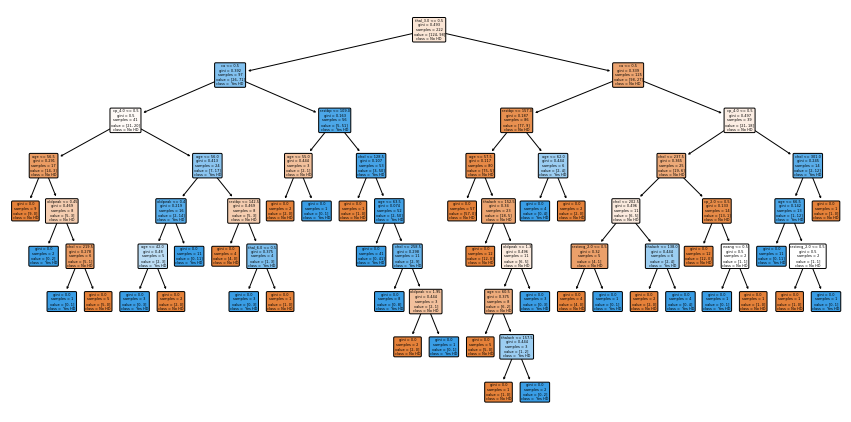

In [65]:
# plot the tree
plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt, filled = True, rounded = True, class_names = ["No HD"," Yes HD"], feature_names = X_encoded.columns)

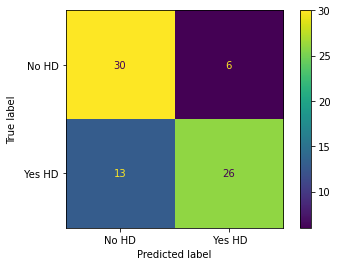

In [66]:
# make prediction on testing data & evaluate the tree performance with a confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ["No HD"," Yes HD"])

### Puning Tree

***Method 1: Visualize alpha***

In [67]:
# determine value for alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) 
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha -> otherwise the tree might only have a root
# store decision trees
clf_dts = []
# create one decision tree for each alpha
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

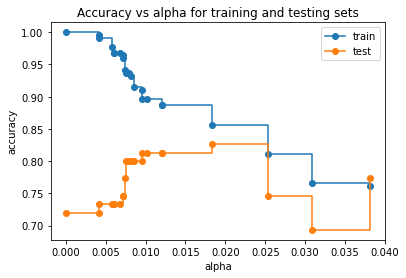

In [73]:
# plot the accuracy of the trees using thr Training and Testing data

train_score = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_score = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_score, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

The accuracy for the Testing data occurs when alpha = 0.016 -> should choose ccp_alpha = 0.016

***Method 2: Cross Validation***

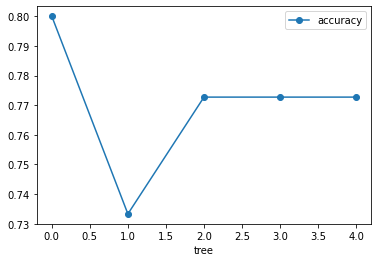

In [81]:
clf_dt = DecisionTreeClassifier(random_state = 4, ccp_alpha = 0.016)
# use 5-fold cv due to the limited data
scores = cross_val_score(clf_dt, X_train, y_train , cv = 5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy':scores})

df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '-')

**This graph shows that alpha is sensitive to the data sets -> use cross validation to find the optimal value**

In [87]:
# store results of each fold
alpha_results_values = []

# for each candidate alpha, run 5-fold CV
# Store the mean and SD of standard deviation in alpha_results
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 4, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
    alpha_results_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

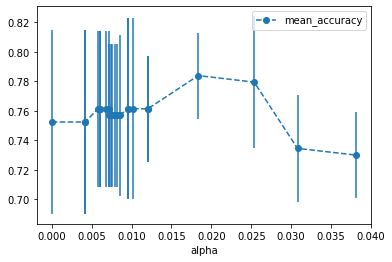

In [89]:
# Plot the mean and SD for each candidate alpha
alpha_results = pd.DataFrame(alpha_results_values, columns = ['alpha', 'mean_accuracy','STD'])

alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'STD', marker = 'o', linestyle = '--')

**Using CV, ccp_alpha should be closer to 0.018**

In [90]:
alpha_results[(alpha_results['alpha']>0.017) & (alpha_results['alpha']<0.019)]

,alpha,mean_accuracy,STD
19,0.018354,0.783939,0.029154


In [92]:
ideal_ccp_alpha = float(alpha_results[(alpha_results['alpha']>0.017) & (alpha_results['alpha']<0.019)]['alpha'])

### Building, Evaluating, Drawing & Interpreting the Final Classification Tree

In [98]:
# Build the tree
clf_dt_pruned = DecisionTreeClassifier(random_state = 4, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clt_dt_pruned.fit(X_train, y_train)

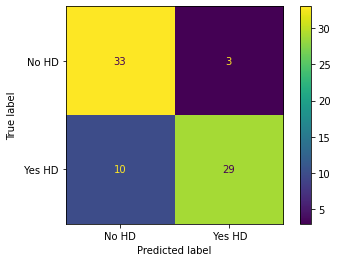

In [100]:
m2 = plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels = ["No HD"," Yes HD"])

[Text(418.5, 356.7375, 'thal_3.0 <= 0.5\ngini = 0.493\nsamples = 222\nvalue = [124, 98]\nclass = No HD'),
 Text(251.10000000000002, 254.8125, 'ca <= 0.5\ngini = 0.392\nsamples = 97\nvalue = [26, 71]\nclass =  Yes HD'),
 Text(167.4, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.5\nsamples = 41\nvalue = [21, 20]\nclass = No HD'),
 Text(83.7, 50.96249999999998, 'gini = 0.291\nsamples = 17\nvalue = [14, 3]\nclass = No HD'),
 Text(251.10000000000002, 50.96249999999998, 'gini = 0.413\nsamples = 24\nvalue = [7, 17]\nclass =  Yes HD'),
 Text(334.8, 152.8875, 'gini = 0.163\nsamples = 56\nvalue = [5, 51]\nclass =  Yes HD'),
 Text(585.9, 254.8125, 'ca <= 0.5\ngini = 0.339\nsamples = 125\nvalue = [98, 27]\nclass = No HD'),
 Text(502.20000000000005, 152.8875, 'gini = 0.187\nsamples = 86\nvalue = [77, 9]\nclass = No HD'),
 Text(669.6, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [21, 18]\nclass = No HD'),
 Text(585.9, 50.96249999999998, 'gini = 0.365\nsamples = 25\nvalue = [19, 6]\nclass = No 

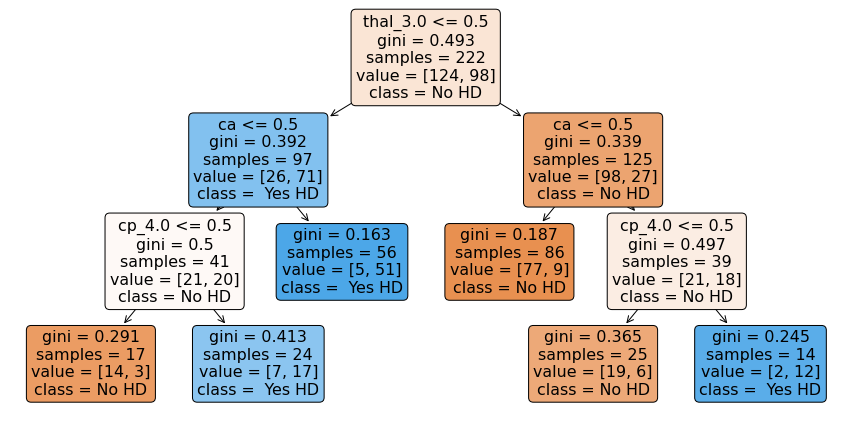

In [103]:
plt.figure(figsize = (15, 7.5))
plot_tree(clt_dt_pruned, filled = True, rounded = True, class_names = ["No HD"," Yes HD"], feature_names = X_encoded.columns)

**Inteprete Tree**
- gini: gini index
- samples: # of samples
- value: how many sameples in each category
- class: which category is represented most in the noed